In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy
from pathlib import Path

import matplotlib.pyplot as plt
from sklearn.cluster import k_means, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
import seaborn as sns

In [2]:
import sys

sys.path.append("../src")

In [3]:
from core import SITE_NAMES
from calls import plot_call_features, compute_features

In [4]:
site_key = 'Carp'
location_call_signals = np.load(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_infile_call_signals.npy', allow_pickle=True)

location_calls_sampled = pd.read_csv(f'../data/detected_calls/{site_key}/2022_{site_key}_top1_infile_call_signals.csv', index_col=0, low_memory=False)
location_calls_sampled['index'] = location_calls_sampled.index

fft_signals = compute_features.generate_ffts_for_calls(location_calls_sampled, location_call_signals)
welch_signals = compute_features.generate_welchs_for_calls(location_calls_sampled, location_call_signals)

In [18]:
location_calls_sampled[location_calls_sampled['file_name']=='20220719_103000.WAV']

,index,SD_card,file_name,site,SNR,sampling_rate
359,359,4,20220719_103000.WAV,Carp Pond,5.766635,250000
360,360,4,20220719_103000.WAV,Carp Pond,0.117226,250000
361,361,4,20220719_103000.WAV,Carp Pond,22.772123,250000
362,362,4,20220719_103000.WAV,Carp Pond,6.991514,250000


In [5]:
welch_data = pd.DataFrame(welch_signals, columns=np.linspace(0, 96000, welch_signals.shape[1]).astype(int))
welch_data.index.name = 'Call #'
welch_data.columns.name = 'Frequency (kHz)'
welch_data

Frequency (kHz),0,969,1939,2909,3878,4848,5818,6787,7757,8727,...,87272,88242,89212,90181,91151,92121,93090,94060,95030,96000
Call #,,,,,,,,,,,,,,,,,,,,,
0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
2,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3870,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3871,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3872,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,...,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0


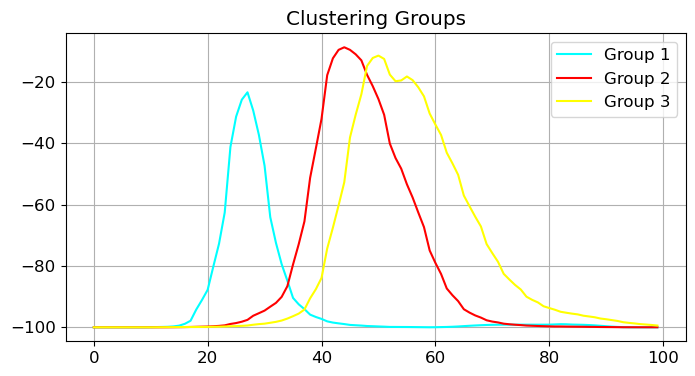

In [12]:
k = 3
color_for_groups = {0: 'cyan', 1: 'red', 2:'yellow'}
label_for_groups = {0: 'LF1', 1: 'HF1', 2:'HF2'}
kmean_welch = KMeans(n_clusters=k, n_init=10, random_state=20).fit(welch_data)
plt.figure(figsize=(8, 4))
plt.title(f'Clustering Groups')
for i in range(k):
    plt.plot(kmean_welch.cluster_centers_[i], label=f'Group {i+1}', color=color_for_groups[i])
plt.grid(which='both')
plt.legend()
plt.show()

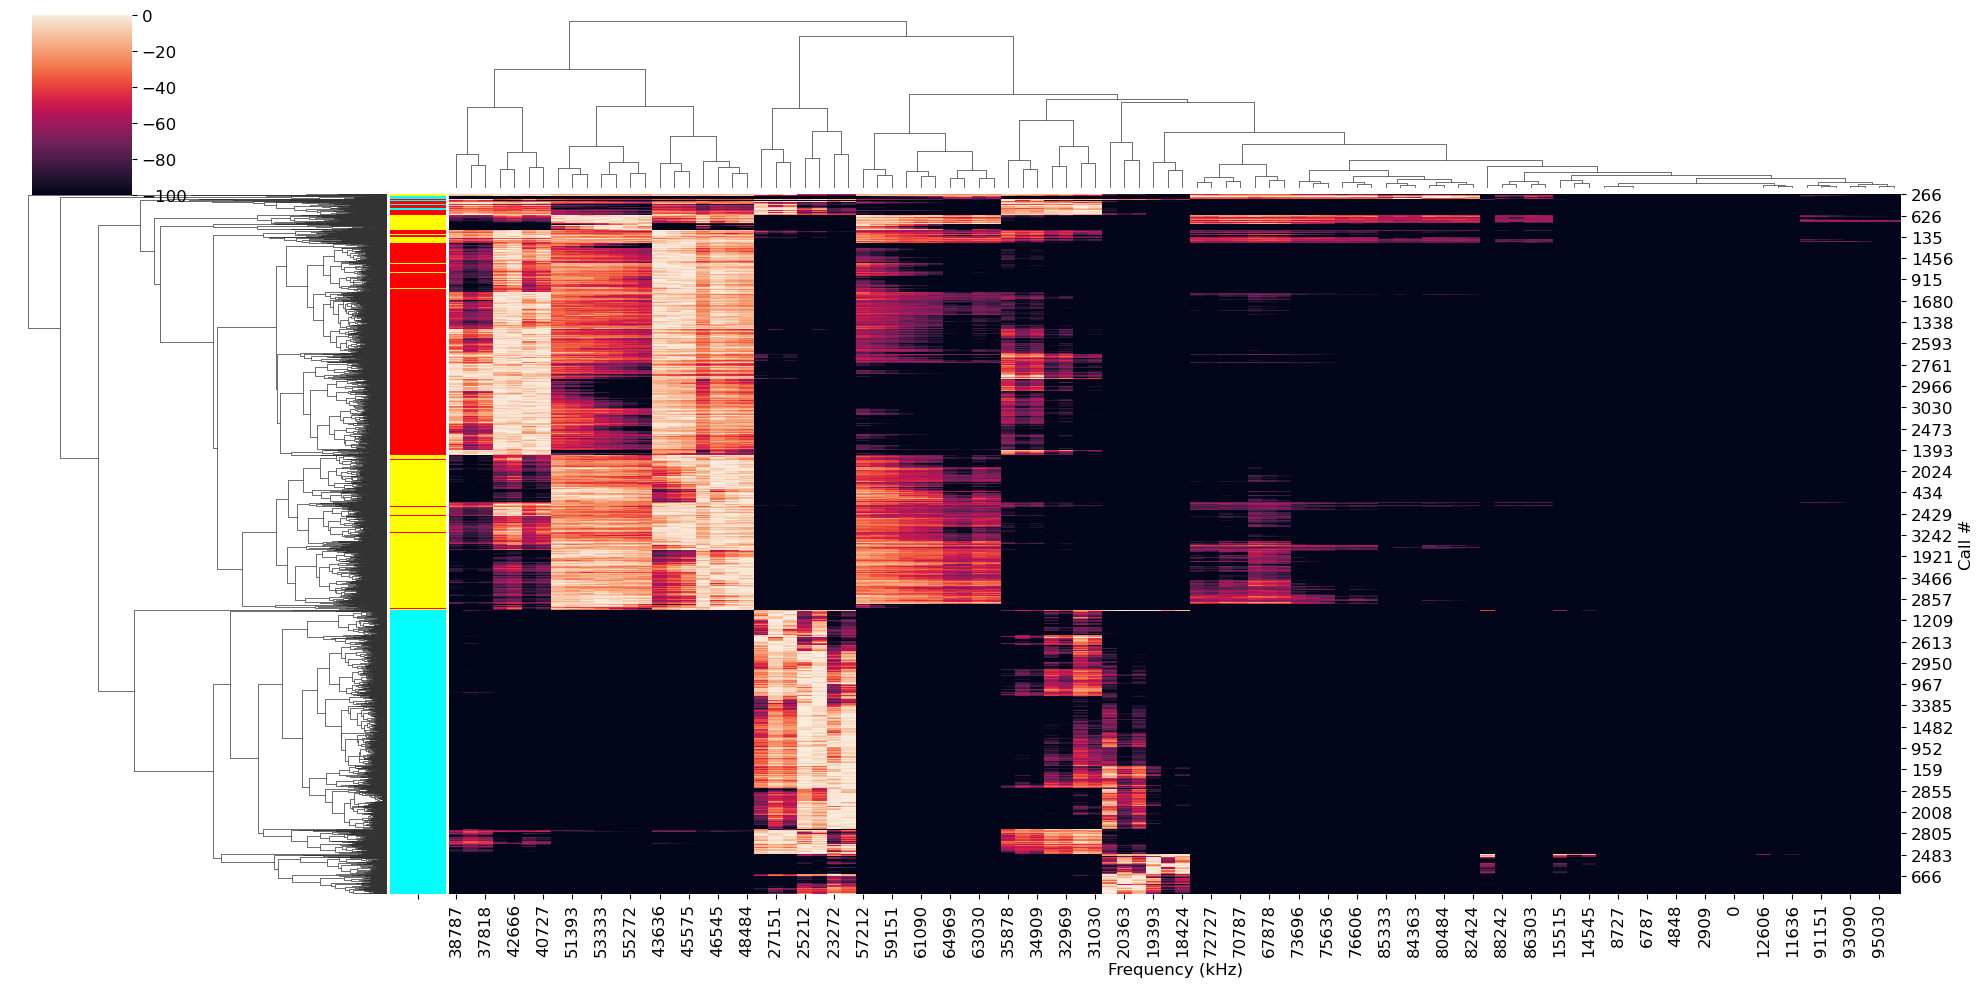

In [16]:
groups = pd.Series(kmean_welch.labels_)
groups_to_labels = groups.map(label_for_groups)
groups_to_colors = groups.map(color_for_groups)
sns.clustermap(welch_data, figsize=(20, 10), row_colors=groups_to_colors)

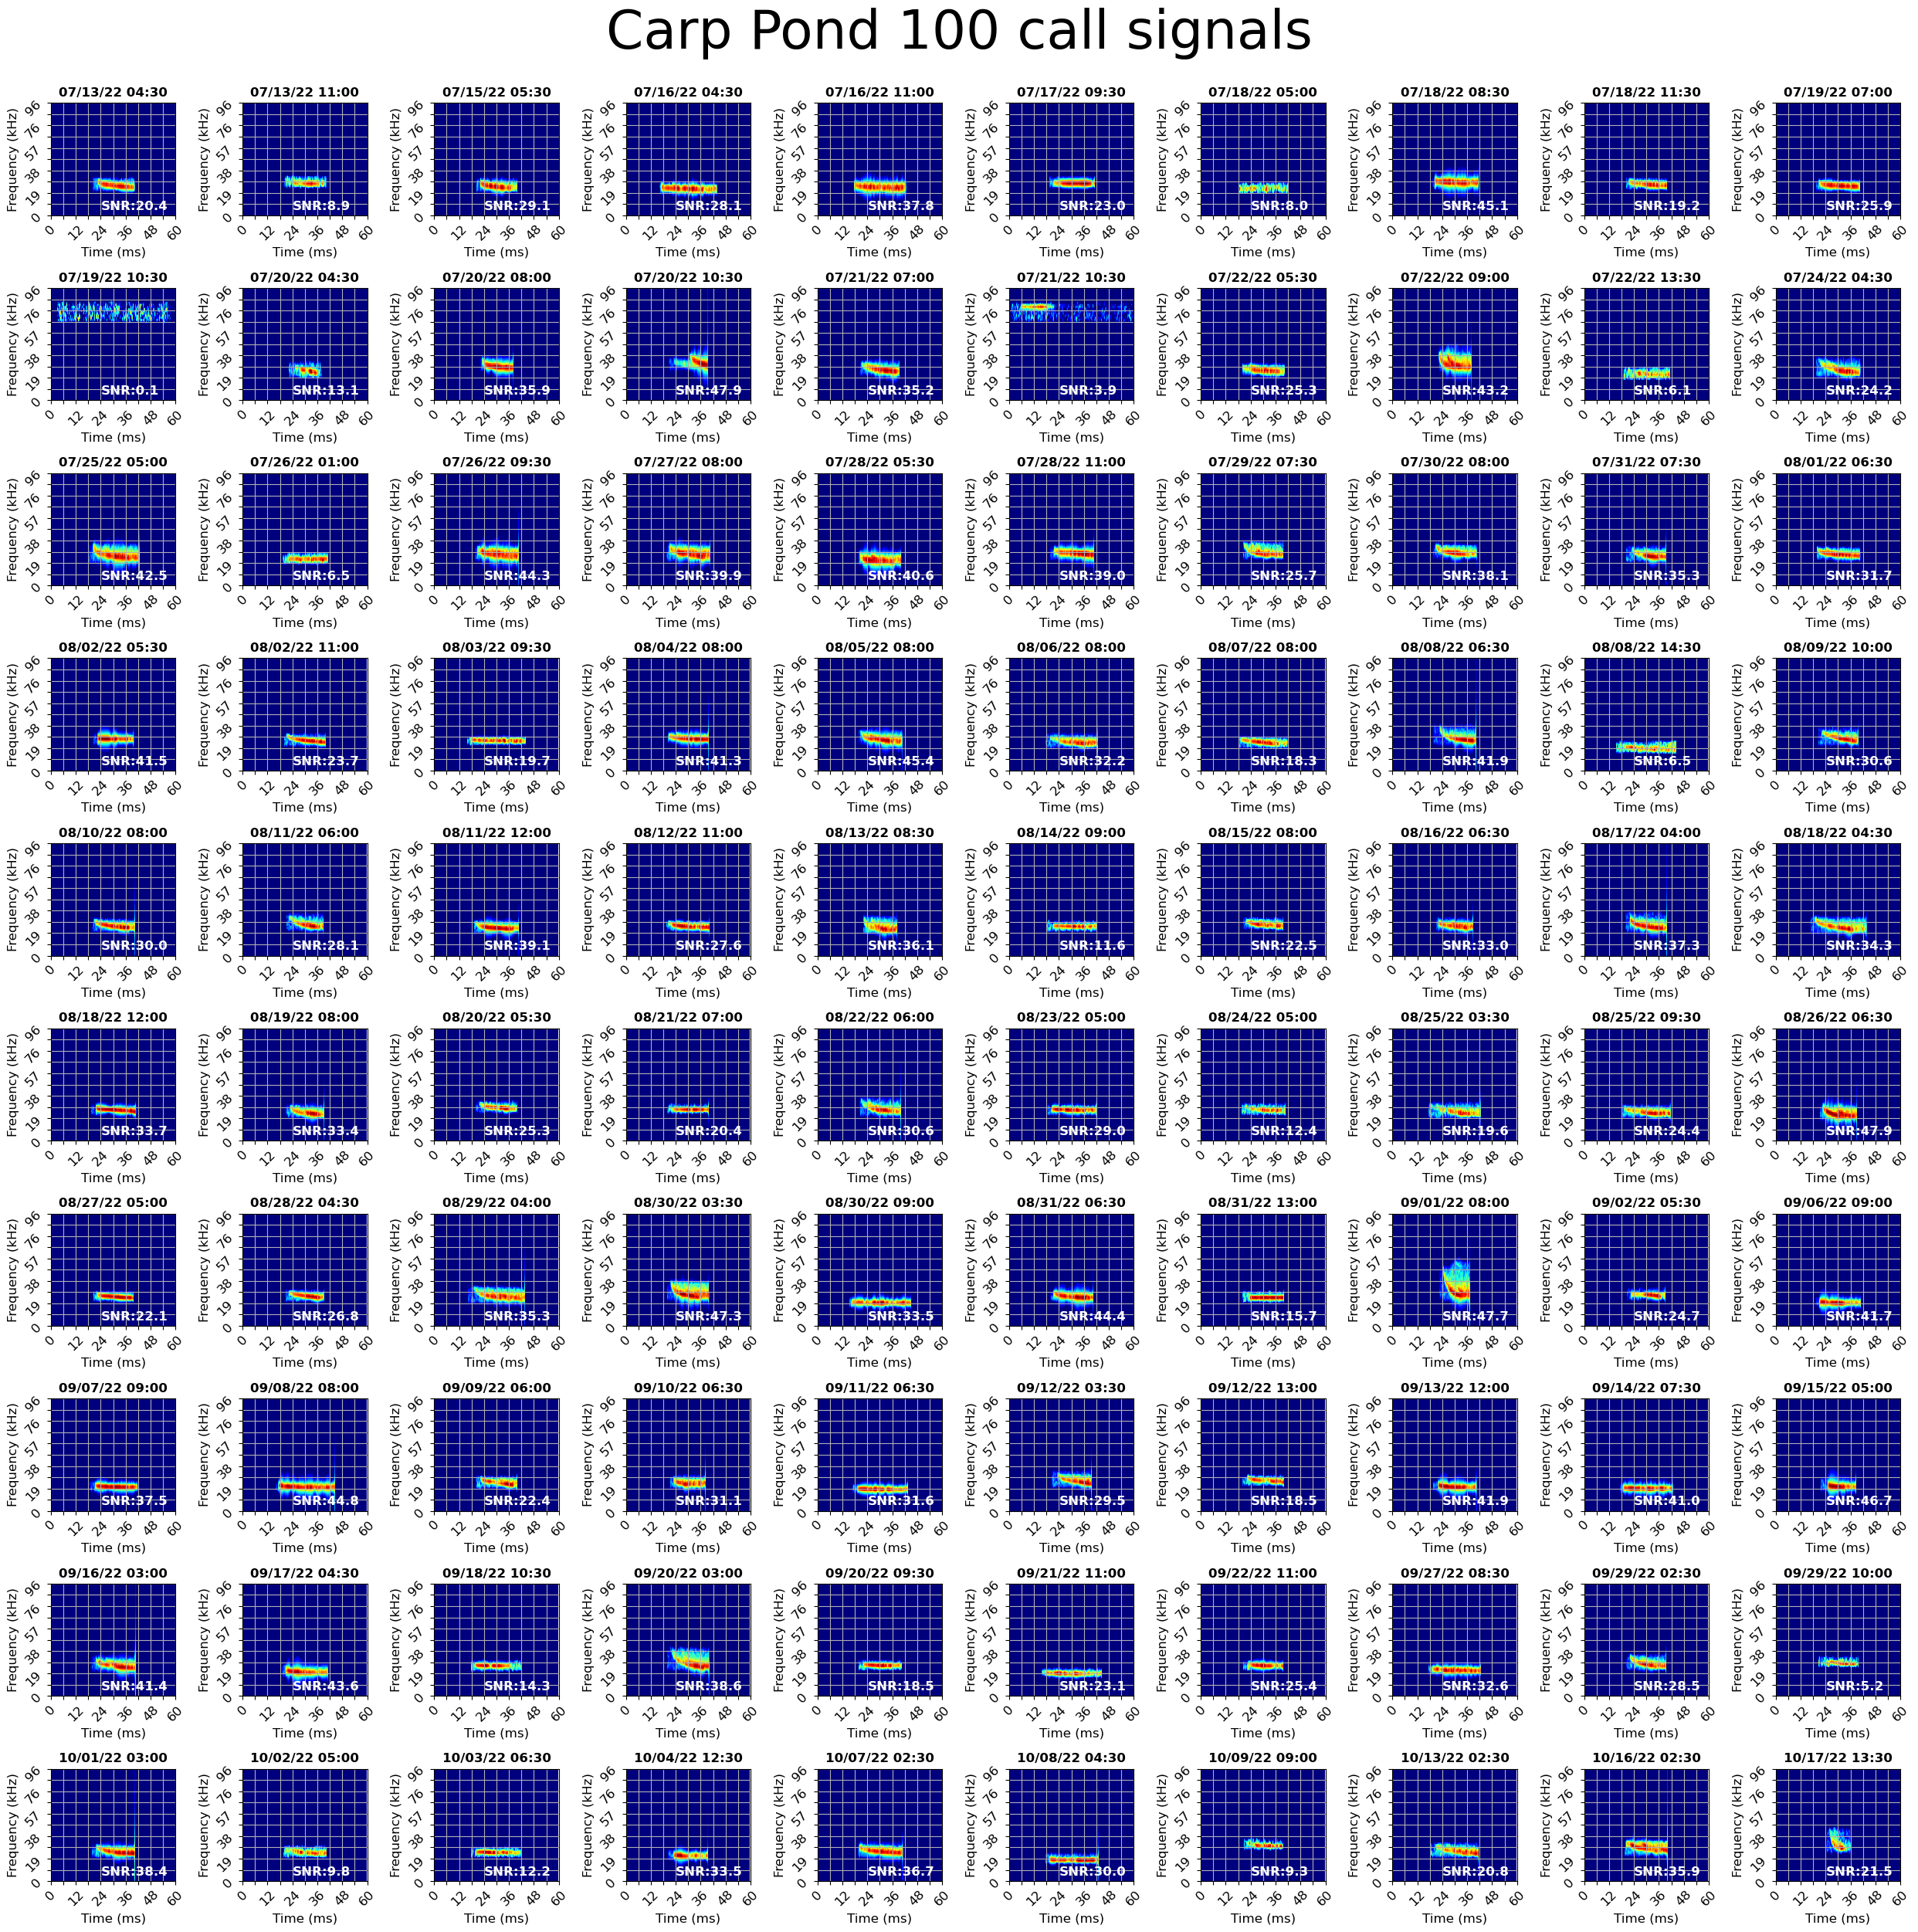

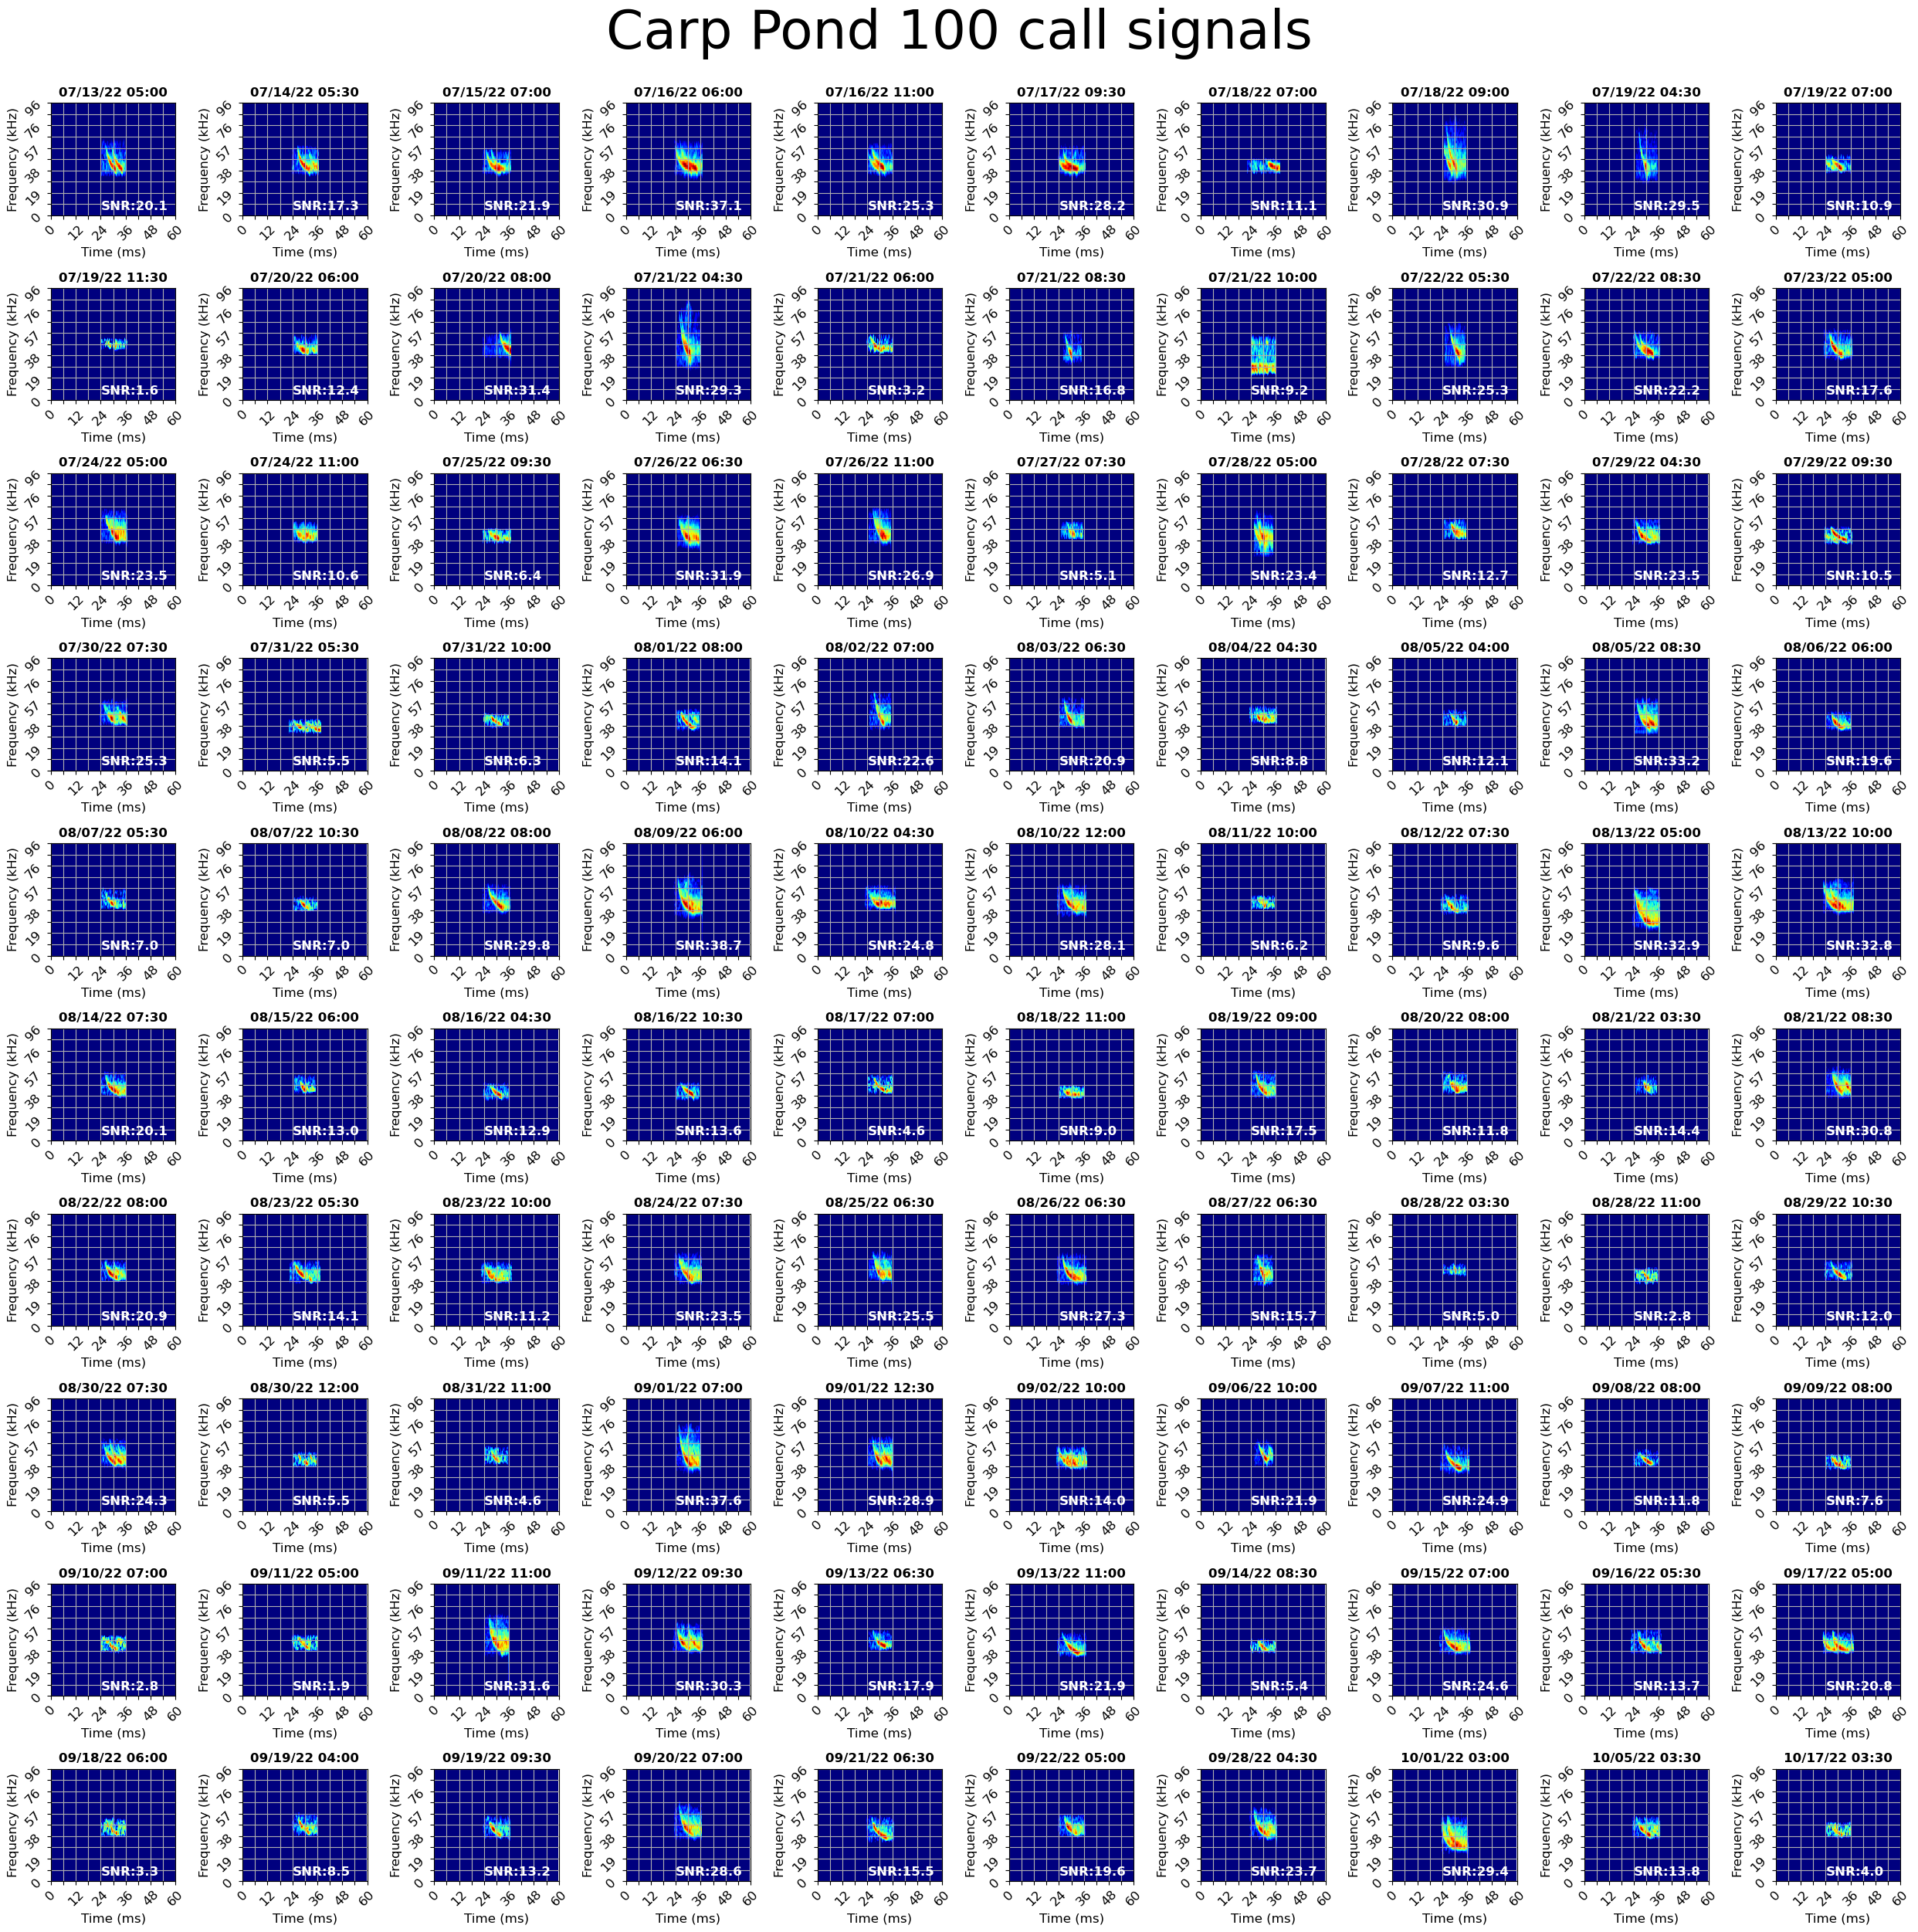

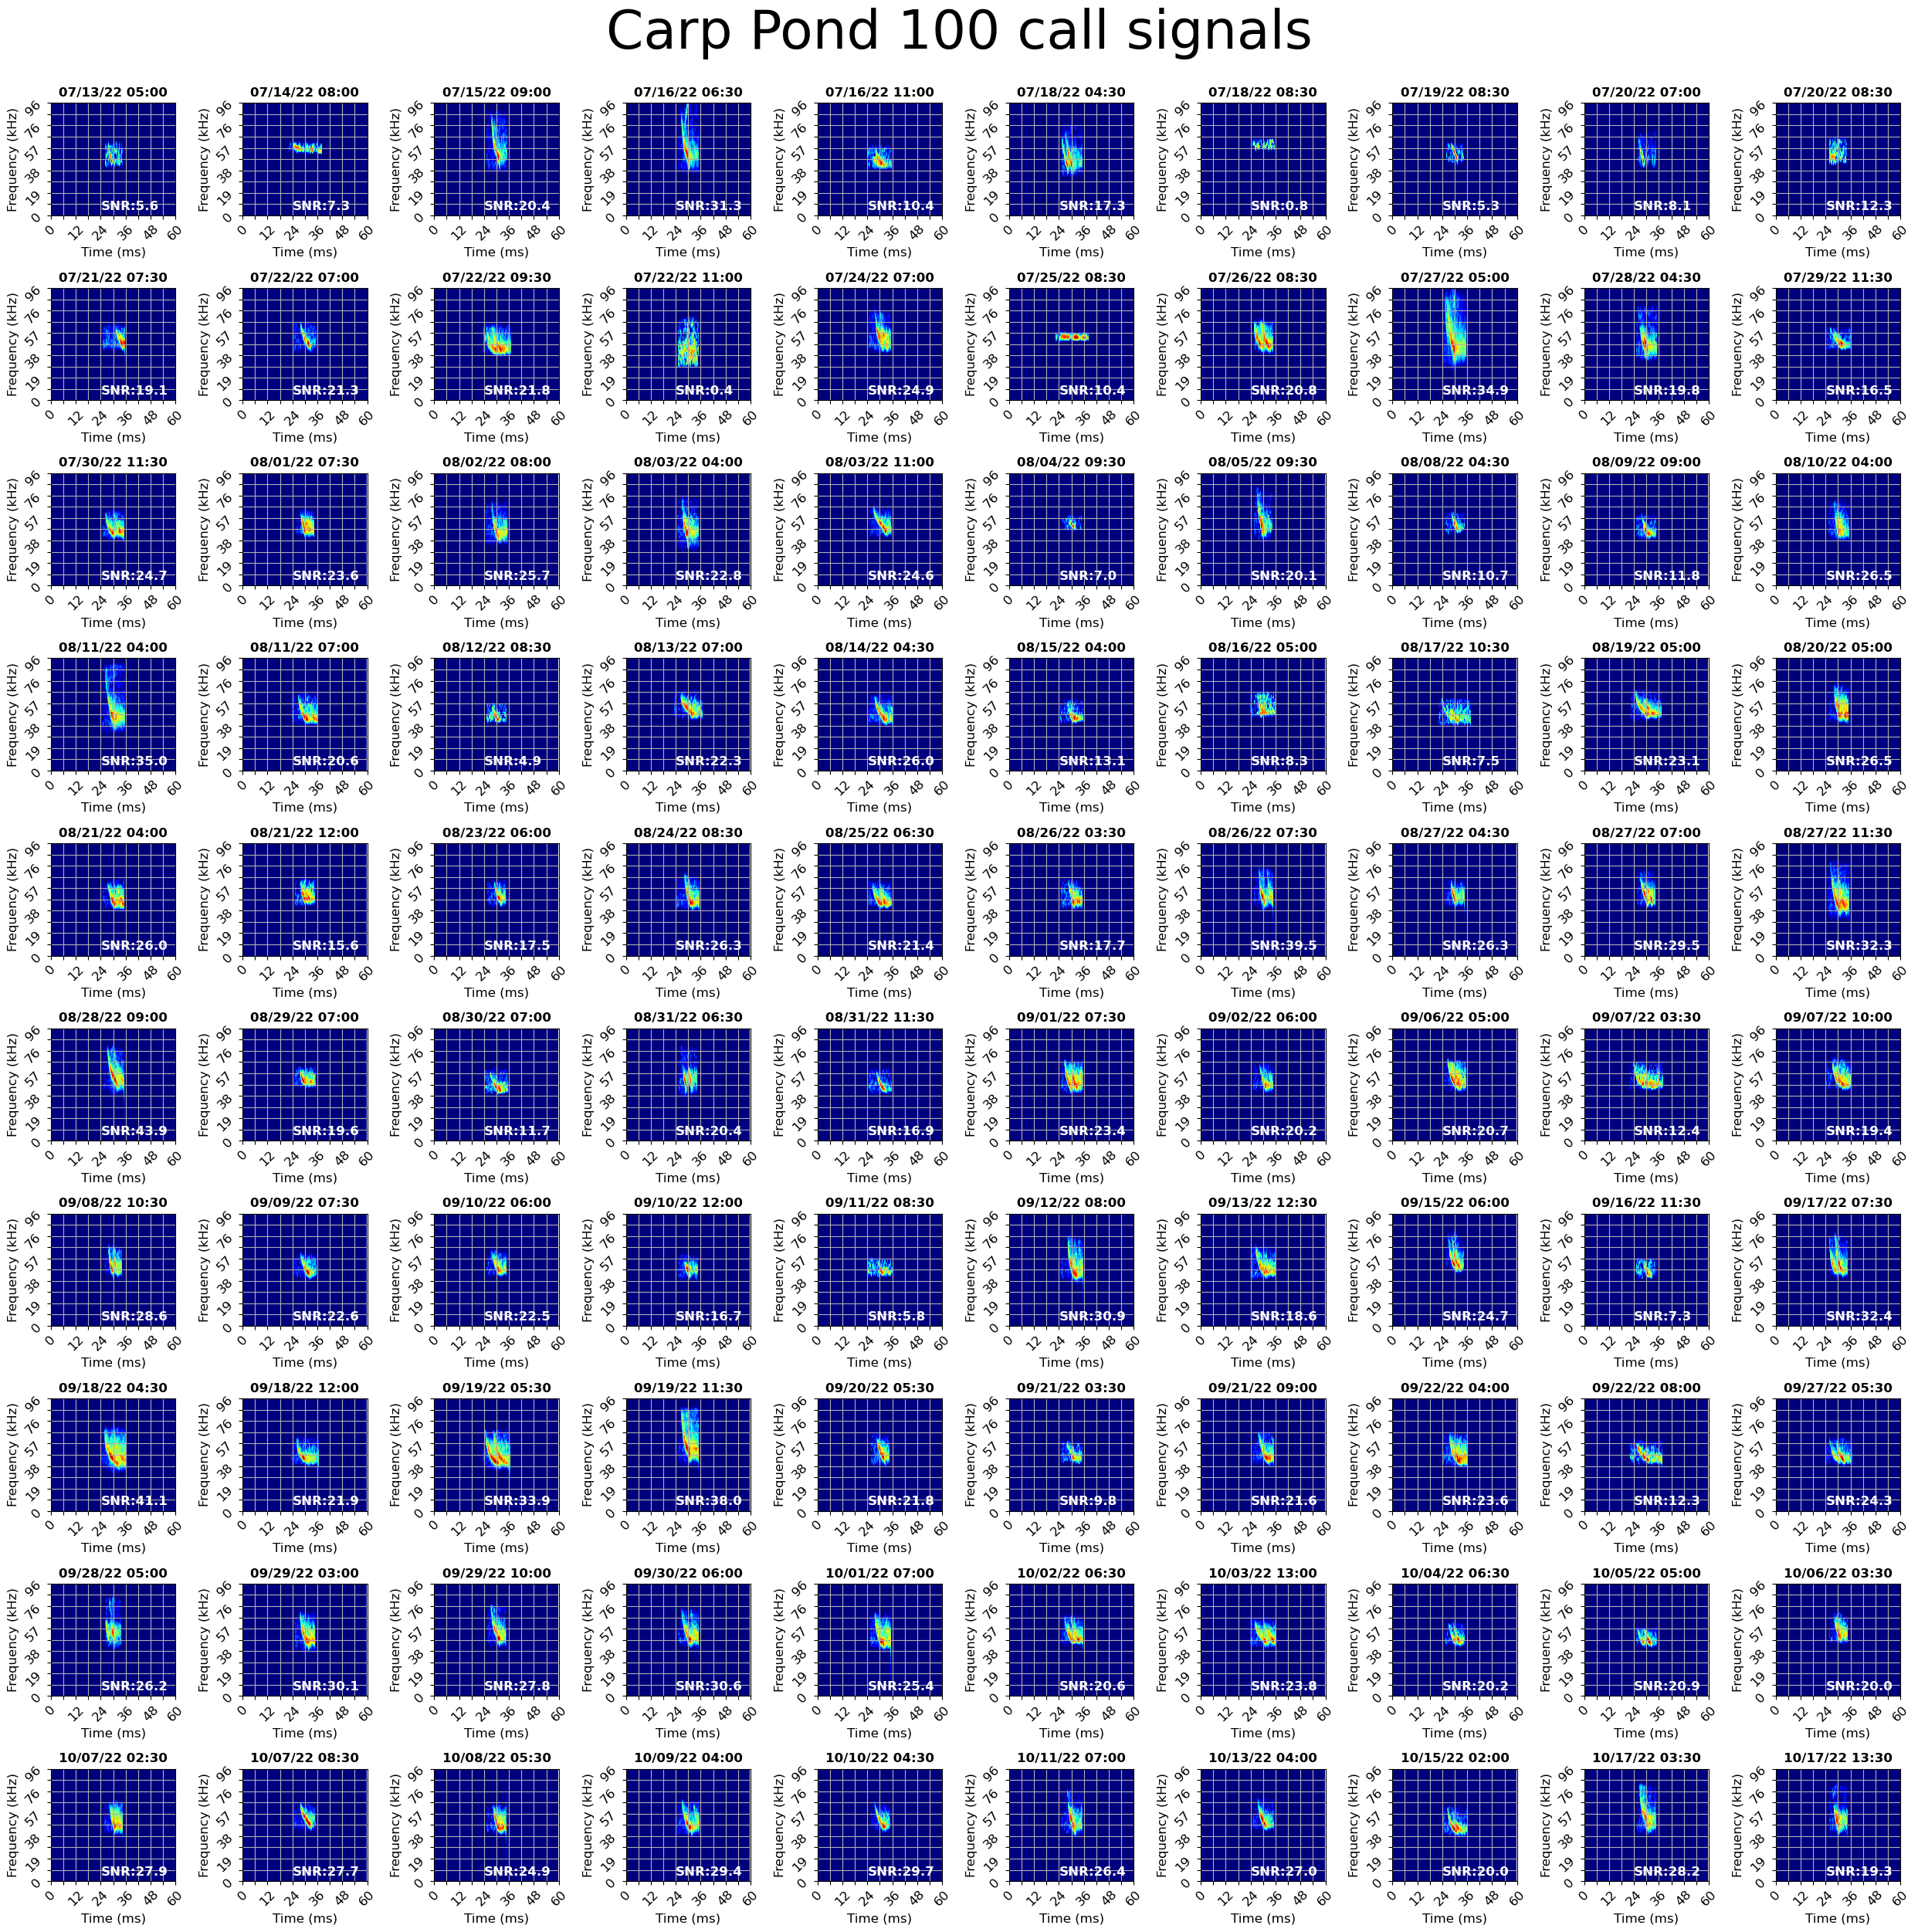

In [15]:
for i in range(k):
    group_calls_sampled = location_calls_sampled[kmean_welch.labels_==i].reset_index().drop(['level_0'], axis=1)
    plot_call_features.plot_hundred_calls(group_calls_sampled, location_call_signals, site_key)